## <font color = 'maroon'>Assignment 1, part 1 of 2</font>

Please **show your work** - i.e., show and explain your code/math, and write your reasoning.

1. **[1 mark]** Load the CSV file country-income-large.csv, which includes both numerical and categorical attributes. Replace NaN values with the mean of the corresponding variable. Display a scatter plot of the resulting dataset, using the numerical variables only, color-coded according to the "Region" column. You are allowed (and encouraged) to seek existing functions for these purposes (e.g. in Pandas).
2.**[1 mark]** Apply the following binning techniques on the previously cleaned data, assuming 5 bins in each case:    
    1. Equal-frequency binning    
    2. Equal-width binning  
Report the results.
2. **[1 mark]** Compute the Pearson correlation coefficient of the numerical variables. Would you say that the variables are strongly correlated? Did you need to compute the correlation coefficient to reach that conclusion?
3. **[1 mark]** Use the Chi-squared test to determine whether the categorical attributes are correlated.
1. **[1 mark]** Take the pre-processed breast cancer dataset from subsection 1.1 of this notebook (where we replaced any missing values with their median). Compute the principal components and report the variance explained by each of them (remove the "Class" column before doing PCA). Show the scatter plot of all samples along the first two principal components, color-coded according to the "Class" column. Ensure that your data is normalized by z-scores prior to performing PCA. Do you think PCA is useful as a preprocessing step for classification in this case?



---



1) [1 mark] Load the CSV file country-income-large.csv, which includes both numerical and categorical attributes. Replace NaN values with the mean of the corresponding variable. Display a scatter plot of the resulting dataset, using the numerical variables only, color-coded according to the "Region" column. You are allowed (and encouraged) to seek existing functions for these purposes (e.g. in Pandas).

In [ ]:
import pandas as pd
data = pd.read_csv('country-income-large.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      60 non-null     int64  
 1   Region          60 non-null     object 
 2   Age             59 non-null     float64
 3   Income          59 non-null     float64
 4   Online Shopper  60 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
data.columns

Index(['Unnamed: 0', 'Region', 'Age', 'Income', 'Online Shopper'], dtype='object')

In [ ]:
#data.head()
print(data.isna().sum())

Unnamed: 0        0
Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64


In [ ]:
data_clean = data.fillna(data.mean())
data_clean.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0        0
Region            0
Age               0
Income            0
Online Shopper    0
dtype: int64

In [ ]:
data_clean.drop(['Unnamed: 0'],axis=1)

In [ ]:
%config InlineBackend.figure_formats = set(['retina'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

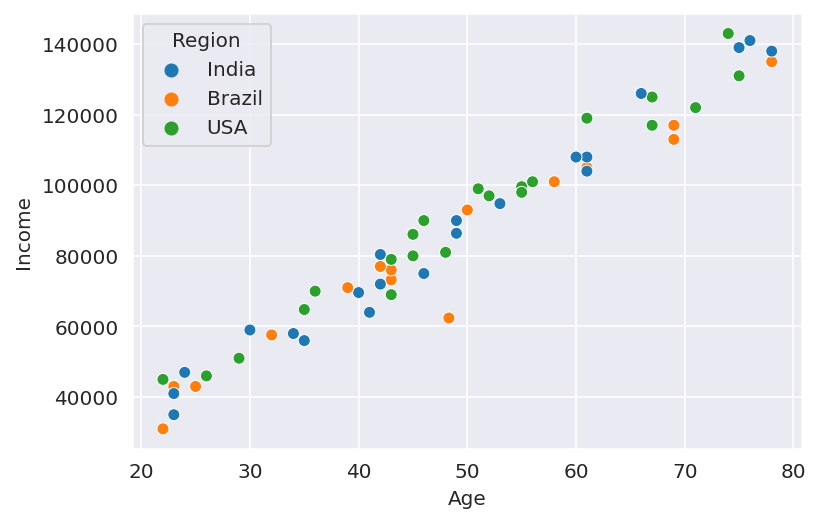

In [ ]:

sns.scatterplot(x='Age', y='Income', hue='Region', data=data_clean)
plt.show()



2) [1 mark] Apply the following binning techniques on the previously cleaned data, assuming 5 bins in each case:
Equal-frequency binning
Equal-width binning
Report the results.


In [ ]:
data_clean['Age'].value_counts()
data_clean['Income'].value_counts()

Equal-width binning

In [ ]:
age_bins = pd.cut(data['Age'],5)
age_bins.value_counts(sort=False)


(21.944, 33.2]    12
(33.2, 44.4]      14
(44.4, 55.6]      13
(55.6, 66.8]       9
(66.8, 78.0]      11
Name: Age, dtype: int64

Equal-frequency binning

In [ ]:
bins = pd.qcut(data['Age'],5)
bins.value_counts(sort=False)

(21.999, 33.2]    12
(33.2, 43.0]      14
(43.0, 51.8]       9
(51.8, 63.0]      12
(63.0, 78.0]      12
Name: Age, dtype: int64

Equal-width binning

In [ ]:
Income_bins = pd.cut(data['Income'],5)
Income_bins.value_counts(sort=False)

(30888.0, 53400.0]      10
(53400.0, 75800.0]      14
(75800.0, 98200.0]      13
(98200.0, 120600.0]     13
(120600.0, 143000.0]     9
Name: Income, dtype: int64

Equal-frequency binning

In [ ]:
bins = pd.qcut(data['Income'],5)
bins.value_counts(sort=False)

(30999.999, 57840.0]    12
(57840.0, 75200.0]      12
(75200.0, 96560.0]      11
(96560.0, 117000.0]     13
(117000.0, 143000.0]    11
Name: Income, dtype: int64

3) [1 mark] Compute the Pearson correlation coefficient of the numerical variables. Would you say that the variables are strongly correlated? Did you need to compute the correlation coefficient to reach that conclusion?

In [ ]:
data_clean['Age'].corr(data_clean['Income'])

0.9809518212686535

4) [1 mark] Use the Chi-squared test to determine whether the categorical attributes are correlated.

In [ ]:
contigency= pd.crosstab(data_clean['Online Shopper'], data_clean['Region']) 
contigency

Region,Brazil,India,USA
Online Shopper,,,
No,9,12,15
Yes,6,11,7


In [ ]:
contigency_region = pd.crosstab(data_clean['Online Shopper'], data_clean['Region'], normalize='columns')
contigency_region

Region,Brazil,India,USA
Online Shopper,,,
No,0.6,0.521739,0.681818
Yes,0.4,0.478261,0.318182


In [ ]:
contigency_shopping = pd.crosstab(data_clean['Online Shopper'], data_clean['Region'], normalize='index')
contigency_shopping

Region,Brazil,India,USA
Online Shopper,,,
No,0.25,0.333333,0.416667
Yes,0.25,0.458333,0.291667


In [ ]:
contigency_all = pd.crosstab(data_clean['Online Shopper'], data_clean['Region'], normalize='all') 
contigency_all

Region,Brazil,India,USA
Online Shopper,,,
No,0.15,0.200000,0.250000
Yes,0.10,0.183333,0.116667


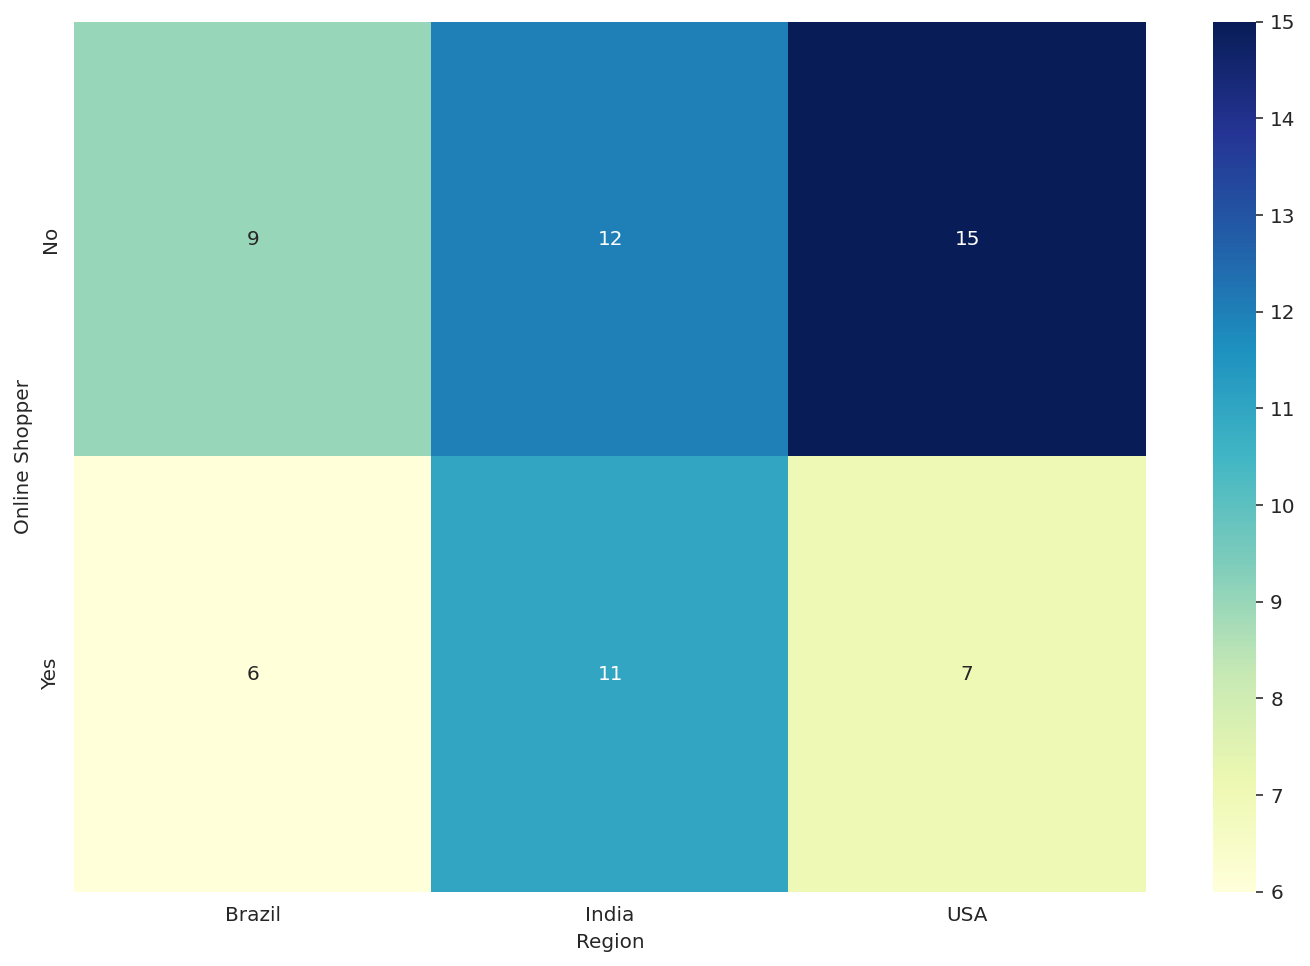

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence. 
!pip install scipy
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.5486489690094807


[1 mark] Take the pre-processed breast cancer dataset from subsection 1.1 of this notebook (where we replaced any missing values with their median). Compute the principal components and report the variance explained by each of them (remove the "Class" column before doing PCA). Show the scatter plot of all samples along the first two principal components, color-coded according to the "Class" column. Ensure that your data is normalized by z-scores prior to performing PCA. Do you think PCA is useful as a preprocessing step for classification in this case?

In [ ]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

import numpy as np

data = data.replace('?',np.NaN)

data.isna().sum()
data = data.fillna(data.median())
data.isna().sum()
data.info()

Number of instances = 699
Number of attributes = 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
data_bn = data.drop(['Class'],axis=1)
data_bn['Bare Nuclei'] = pd.to_numeric(data_bn['Bare Nuclei'])
Z = (data_bn-data_bn.mean())/data_bn.std()
Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
Z2.shape

(648, 9)

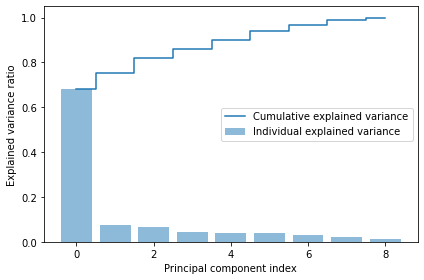

In [ ]:
#
# Scale the dataset; This is very important before you apply PCA
#
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


X_train_std = Z2
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(Z2)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data[['Class']]], axis = 1)

Text(0, 0.5, 'pc2')

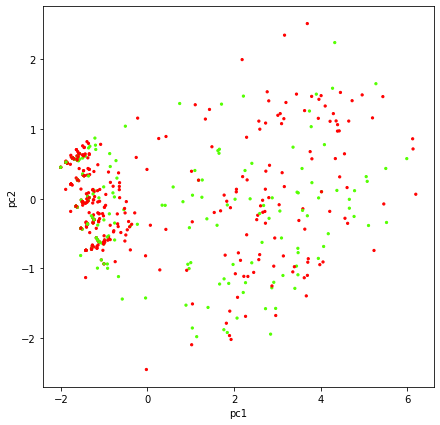

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf['Class'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')